# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  Dataset yang saya gunakan adalah dataset dari Kaggle yang diberikan sebagai contoh oleh pihak Dicoding untuk menyelesaikan Submission kelas ini. Dataset ini bernama **Bank Transaction Dataset for Fraud Detection**. Dataset ini dirancang untuk analisis transaksi perbankan dan sering digunakan untuk mendeteksi pola atau anomali. Dataset dapat diakses melalui tautan berikut:
  
  🔗 [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. Ketentuan ini sudah terpenuhi, karena setelah saya cek di Dataset ini belum ada label.
   - **Jumlah Baris**: Dataset yang saya  gunakan setelah dicek terdapat 2512 baris berdasarkan informasi dari Kaggle.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**. Dataset saya mengandung kombinasi data kategorikal dan numerikal, sesuai dengan ketentuan yang diberikan. Berikut adalah rinciannya berdasarkan kolom yang ada
     - *Kategorikal*: Beberapa diantaranya adalah Channel (Onlin/ATM/Branch), TransactionType, CostumerOccupation.
     - *Numerikal*: Contohnya CustomerAge, AccountBalance, TransactionAmount

3. **Pembatasan**:  
   Dataset yang digunakan tidak pernah dilakukan latihan clustering sebelumnya sehingga cocok digunakan untuk tugas ini.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Mengimpor pustaka untuk manipulasi data
import numpy as np
import pandas as pd

# Mengimpor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor pustaka untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Mengimpor pustaka untuk clustering dan evaluasi
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset dari file CSV
df = pd.read_csv('bank_transactions_data_2.csv')

# Menampilkan lima baris pertama dari dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Dataset yang digunakan dalam proyek ini adalah Bank Transaction Dataset for Fraud Detection yang diambil dari Kaggle. Dataset ini berisi informasi transaksi perbankan dan memiliki berbagai fitur numerikal serta kategorikal yang dapat digunakan untuk clustering.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1. Memahami Struktur Data

In [3]:
# Memahami Struktur Data
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

**Informasi Dataset:**

* Dataset terdiri dari 2512 entri dan 16 kolom.

* Terdapat 5 kolom numerik yang terdiri dari 3 kolom (int64), 2 kolom float64, dan 11 kolom objek (string).

* Beberapa kolom yang berisi data transaksi termasuk TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, dll.

In [4]:
# Melihat jumlah nilai unik pada data kategorikal
print(df.nunique())

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


Data menunjukkan variasi tinggi pada fitur seperti TransactionID, TransactionAmount, dan AccountBalance. Beberapa fitur seperti TransactionType, Channel, dan CustomerOccupation memiliki kategori terbatas, sementara MerchantID, Location, dan DeviceID menunjukkan keragaman yang cukup besar pada entitas transaksi.

#### 2. Menangani Data yang Hilang

In [5]:
# Menangani Data yang Hilang
print("\nCek Missing Values:")
print(df.isnull().sum())


Cek Missing Values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Tidak ada nilai yang hilang dalam dataset.

#### 3. Analisis Distribusi dan Korelasi

In [6]:
# Statik Data Numerik
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


**Statistik Deskriptif:**

a) TransactionAmount (Jumlah Transaksi)

* Rata-rata transaksi: 297.59

* Minimum transaksi: 0.26

* Maksimum transaksi: 1919.11

* Distribusi cukup luas dengan standar deviasi 291.95 , menunjukkan adanya transaksi dengan jumlah yang sangat kecil hingga besar.

b) CustomerAge (Usia Pelanggan)

* Rata-rata usia pelanggan: 44.67 tahun

* Usia minimum: 18 tahun, usia maksimum 80 tahun

* Mayoritas pelanggan berusia antara 27 - 59 tahun.

c) TransactionDuration (Durasi Transaksi)

* Rata-rata durasi transaksi: 119.64 detik

* Minimum: 10 detik, maksimum: 300 detik

* Menunjukkan bahwa beberapa transaksi sangat cepat, sementara yang lain membutuhkan waktu lebih lama.

d) LoginAttempts (Jumlah Percobaan Login)

* Rata-rata percobaan login: 1.12 kali

* Mayoritas pengguna hanya mencoba login sekali, tetapi ada beberapa yang mencapai 5 kali (indikasi kemungkinan percobaan login yang gagal).

e) AccountBalance (Saldo Akun)

* Rata-rata saldo pelanggan: 5114.30

* Saldo minimum: 101.25 , saldo maksimum: 14,977.99

* Distribusi saldo menunjukkan beberapa pelanggan dengan saldo yang sangat kecil dan beberapa dengan saldo yang sangat besar.

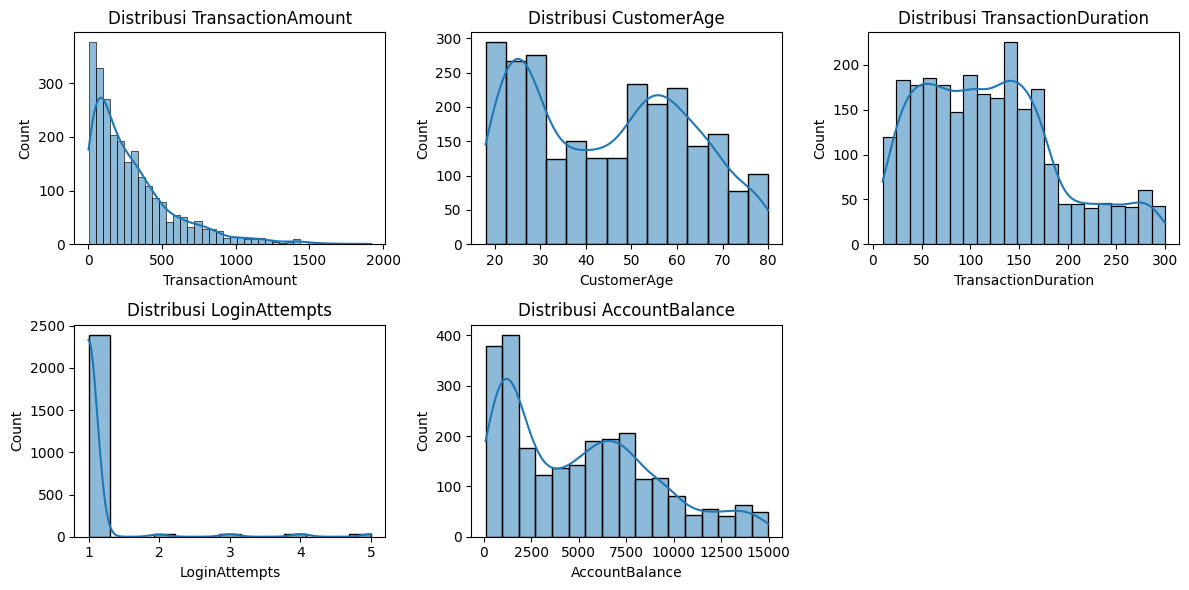

In [7]:
# Visualisasi Distribusi Variabel Numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns)//2 + 1, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Insight dari Distribusi Variabel Numerik**

- **TransactionAmount**: Distribusi sangat miring ke kanan (right-skewed), mayoritas transaksi bernilai kecil (di bawah 500), sementara hanya sebagian kecil yang bernilai sangat besar.
  
- **CustomerAge**: Distribusi agak bimodal (dua puncak) dengan kelompok utama di usia 25-35 tahun dan 50-60 tahun.

- **TransactionDuration**: Terdistribusi miring ke kanan, sebagian besar transaksi selesai di bawah 200 detik.

- **LoginAttempts**: Mayoritas pengguna hanya melakukan 1 kali percobaan login, sangat sedikit yang lebih dari 1.

- **AccountBalance**: Distribusi juga miring ke kanan, kebanyakan pelanggan memiliki saldo di bawah 7500, namun terdapat beberapa outlier dengan saldo tinggi (> 10.000).



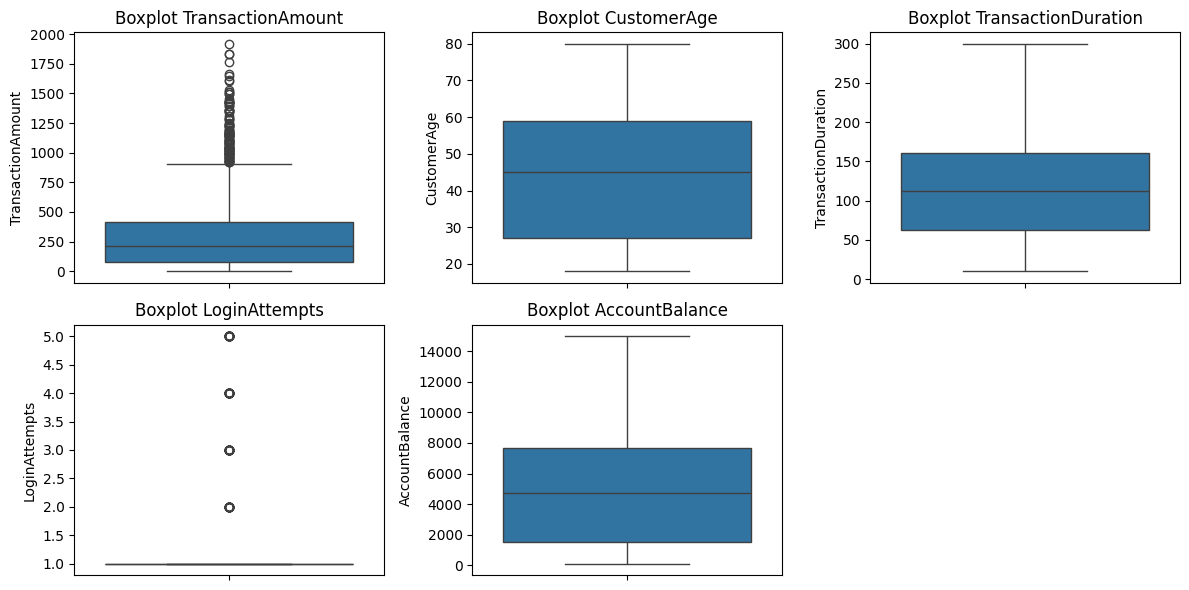

In [8]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

- **TransactionAmount**: Terlihat banyak sekali outlier di sisi atas (extreme high values) yang menunjukkan terdapat sejumlah transaksi dengan nominal yang jauh lebih besar dibanding transaksi lainnya. Ini bisa jadi indikasi transaksi spesial atau potensi anomali.

- **CustomerAge**: Hampir tidak terdapat outlier yang signifikan. Distribusi usia nasabah cukup merata dan wajar, mayoritas berada pada rentang 20–80 tahun.

- **TransactionDuration**: Terdapat beberapa outlier di nilai tinggi (> 250 detik) yang mengindikasikan ada transaksi yang memakan waktu jauh lebih lama dari biasanya.

- **LoginAttempts**: Terlihat adanya outlier pada percobaan login, di mana sebagian kecil pengguna melakukan login lebih dari 2 kali, bahkan hingga 5 kali. Ini bisa menjadi sinyal aktivitas mencurigakan seperti brute force atau lupa password.

- **AccountBalance**: Ditemukan beberapa outlier yang menunjukkan sebagian kecil nasabah memiliki saldo jauh lebih besar dari mayoritas nasabah lain (>12.000), yang bisa menunjukkan pelanggan VIP atau potensi data yang perlu dikaji lebih lanjut.

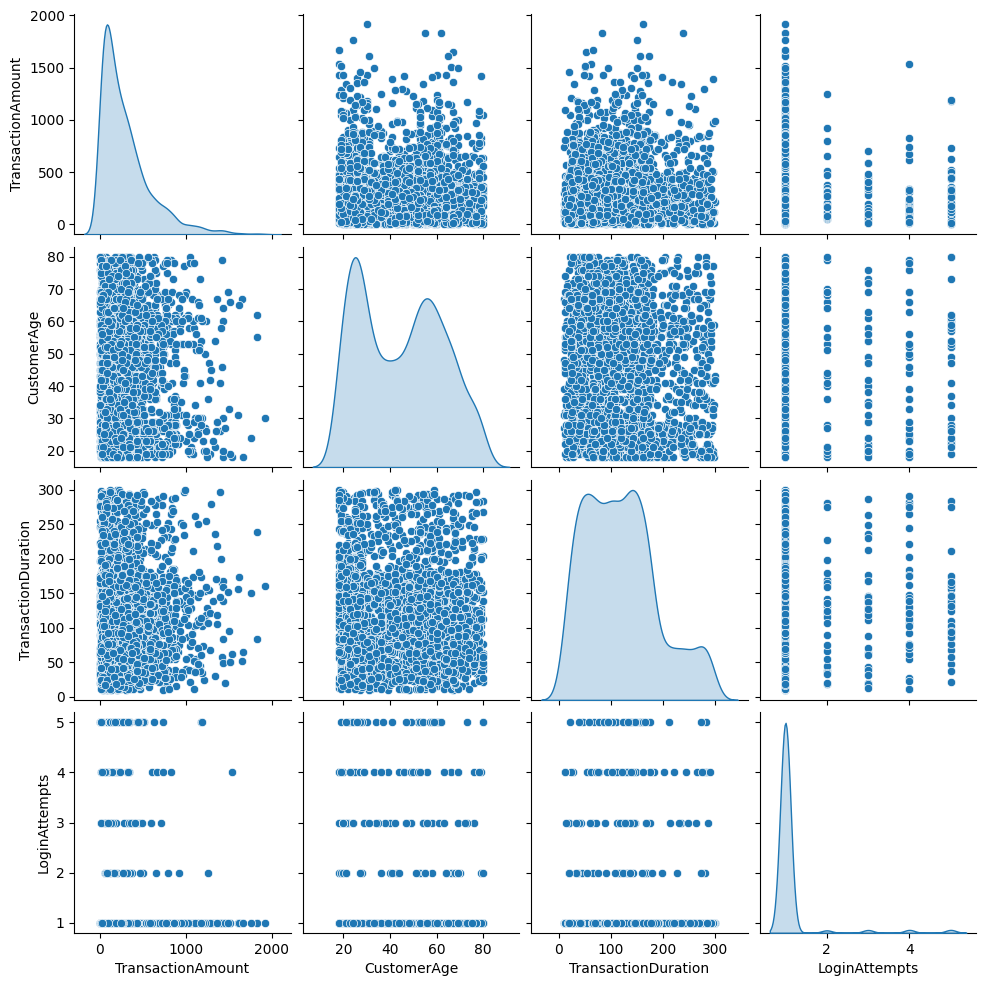

In [9]:
# Scatter Plot untuk Melihat Korelasi Variabel Numerik
correlation_matrix = df[numerical_columns].corr()
high_corr_features = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
selected_features = high_corr_features.dropna(how='all', axis=1).columns

selected_features = selected_features[:4] if len(selected_features) > 4 else selected_features

if len(selected_features) > 1:
    sns.pairplot(df[selected_features], diag_kind='kde')
    plt.show()
else:
    print("Tidak ada fitur dengan korelasi tinggi yang cukup untuk scatter plot.")

**Insight dari Scatter Plot (Pairplot)**

1. **TransactionAmount**  
   - Distribusi *right-skewed* (condong ke kanan), menunjukkan mayoritas transaksi bernilai kecil, hanya sebagian kecil yang bernilai besar.
   - Tidak terlihat korelasi yang signifikan dengan variabel lain, distribusi titik pada scatter plot tampak menyebar secara acak terhadap variabel lain.

2. **CustomerAge**  
   - Distribusi terlihat *bimodal*, yang berarti terdapat dua kelompok usia dominan (misalnya, kelompok usia muda dan kelompok usia tua).
   - Hubungan dengan *TransactionAmount* dan *TransactionDuration* tampak lemah, karena scatter plot menunjukkan penyebaran titik yang tidak membentuk pola.

3. **TransactionDuration**  
   - Distribusi cenderung merata, dengan kecenderungan konsentrasi di tengah.
   - Tidak ada pola hubungan yang kuat dengan variabel numerik lain.

4. **LoginAttempts**  
   - Merupakan variabel diskrit, terlihat dari titik-titik yang membentuk garis sejajar (jumlah percobaan login umumnya berupa angka bulat seperti 1, 2, 3).
   - Hubungan dengan variabel lain juga tidak menunjukkan korelasi yang kuat.### **Insight dari Scatter Plot (Pairplot)**
Berdasarkan scatter plot di atas, berikut beberapa insight penting terkait distribusi dan hubungan antar variabel numerik:

1. **TransactionAmount**  
   - Distribusinya **skewed ke kanan** (right-skewed), artinya lebih banyak transaksi dengan jumlah kecil dibandingkan jumlah besar.  
   - Tidak ada pola korelasi yang jelas antara **TransactionAmount** dengan variabel lain.

2. **CustomerAge**  
   - Distribusinya **bimodal**, menunjukkan ada dua kelompok usia dominan (kemungkinan muda dan tua).  
   - Tidak ada korelasi jelas dengan **TransactionAmount** dan **TransactionDuration**, karena titik-titik tersebar secara acak.

3. **TransactionDuration**  
   - Distribusi cukup merata dengan sedikit kecenderungan ke bagian tengah.  
   - Tidak ada hubungan linear yang kuat dengan variabel lain.

4. **LoginAttempts**  
   - Variabel ini **diskrit**, terlihat dari distribusi yang berupa titik-titik sejajar.  
   - Tidak ada pola korelasi yang jelas dengan variabel lainnya.

#### 4. Visualisasi Data

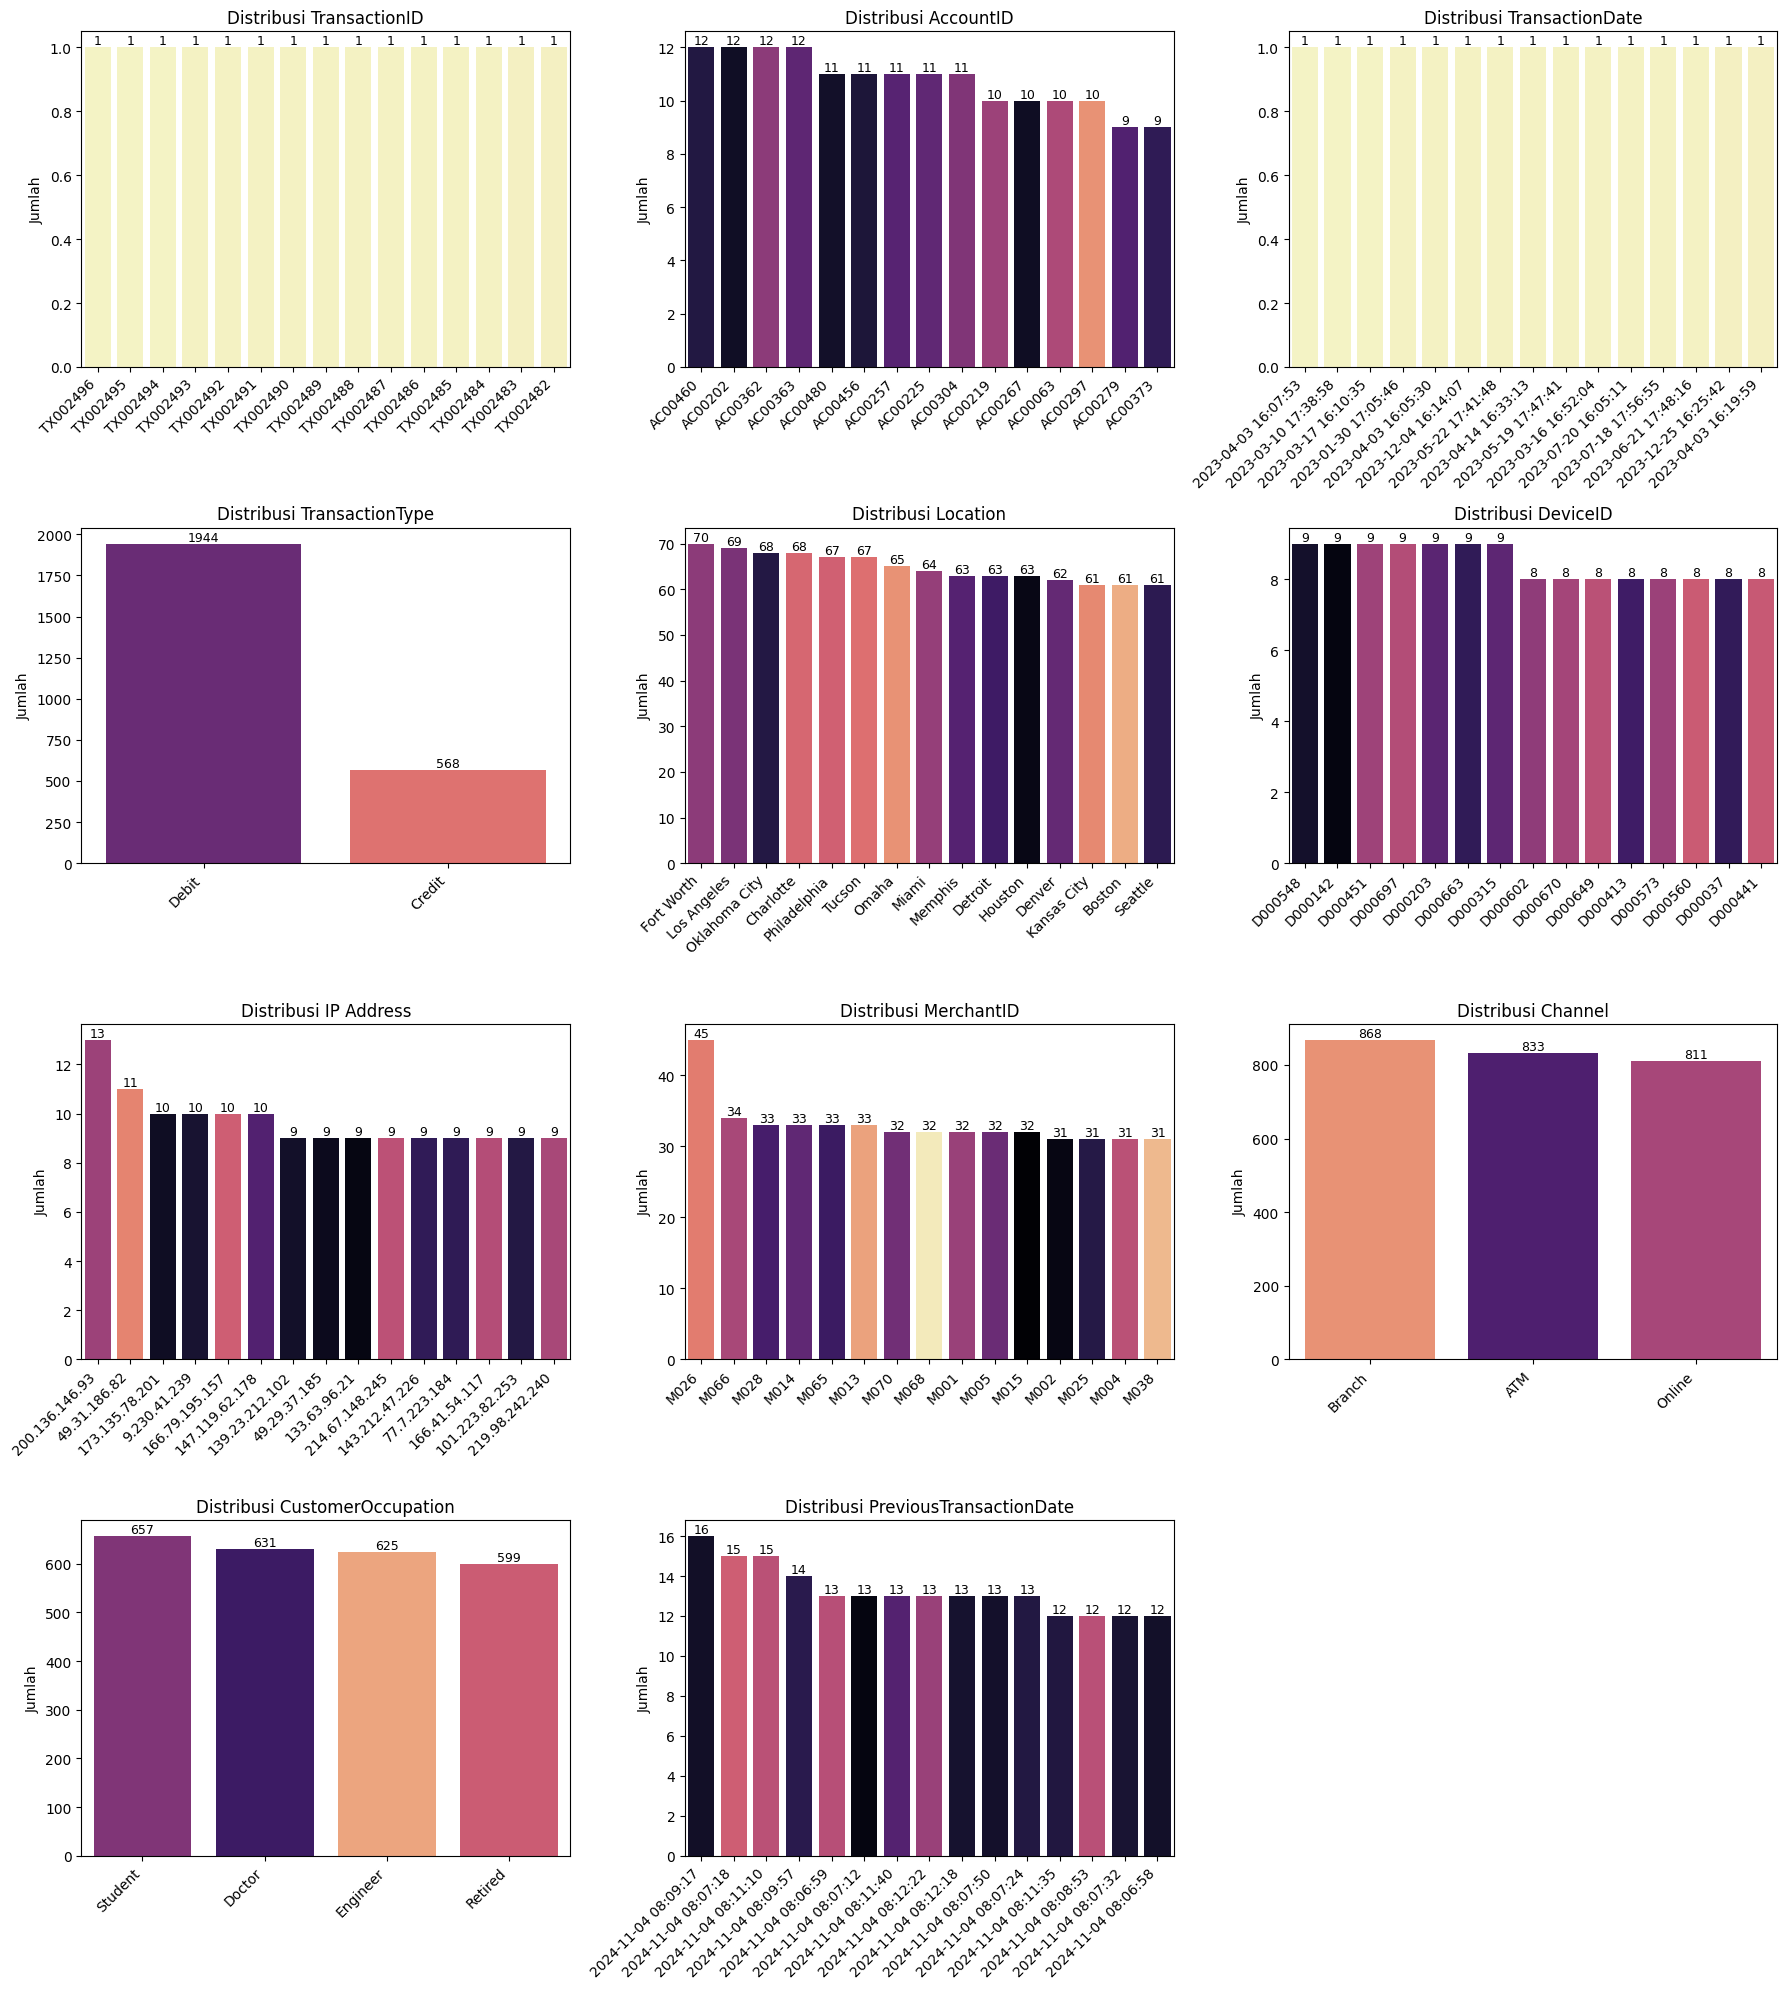

In [10]:
# Daftar kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Menentukan ukuran grid berdasarkan jumlah variabel
n_cols = 3  # Jumlah kolom dalam grid
n_rows = -(-len(categorical_columns) // n_cols)  # Pembulatan ke atas untuk jumlah baris

plt.figure(figsize=(6 * n_cols, 5 * n_rows))  # Atur ukuran gambar

# Loop untuk membuat diagram batang masing-masing variabel kategorikal
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    # Ambil 15 kategori terbanyak
    top_categories = df[col].value_counts().nlargest(15).index

    # Plot countplot dengan hue sama dengan x agar tidak muncul warning
    ax = sns.countplot(x=df[col], order=top_categories, hue=df[col], palette="magma", legend=False)

    # Menampilkan angka di atas batang
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label x agar lebih terbaca
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel('')  # Hilangkan label x untuk menghemat ruang
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

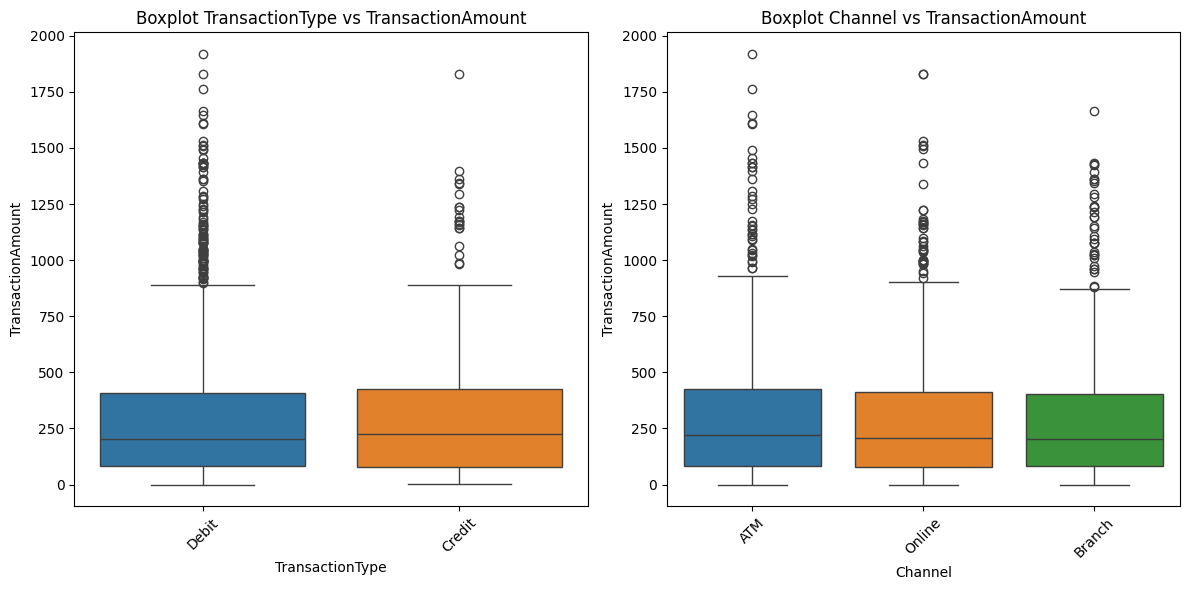

In [11]:
# Boxplot untuk Melihat Hubungan Variabel Kategorikal dengan Variabel Numerik
# Pastikan df sudah didefinisikan sebelumnya

plt.figure(figsize=(12, 6))

categorical_columns = ['TransactionType', 'Channel']
numerical_column = 'TransactionAmount'

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], y=df[numerical_column], hue=df[col], legend=False)  # Tambahkan hue

    plt.xticks(rotation=45)
    plt.title(f'Boxplot {col} vs {numerical_column}')
    plt.xlabel(col)
    plt.ylabel(numerical_column)

plt.tight_layout()
plt.show()

**Insight Boxplot Hubungan Variabel Kategorikal dengan Variabel Numerik**

1. Boxplot TransactionType vs TransactionAmount

* Distribusi transaksi untuk Debit dan Credit hampir mirip, dengan mayoritas transaksi berada di bawah 500.

* Terdapat beberapa outlier yang menunjukkan transaksi dengan jumlah besar, bahkan mencapai 1.500 – 2.000.

* Median transaksi untuk Credit sedikit lebih tinggi dibandingkan Debit, meskipun secara keseluruhan distribusinya serupa.

2. Boxplot Channel vs TransactionAmount
* Ketiga kanal transaksi (ATM, Online, Branch) memiliki distribusi transaksi yang serupa, dengan mayoritas transaksi berada di bawah 500.

* Median transaksi pada ketiga kanal juga relatif sama, menunjukkan bahwa tidak ada kanal yang secara signifikan lebih besar dari yang lain dalam hal nilai transaksi.

* Terdapat banyak outlier di ketiga kanal, menunjukkan adanya beberapa transaksi bernilai tinggi di semua metode transaksi.

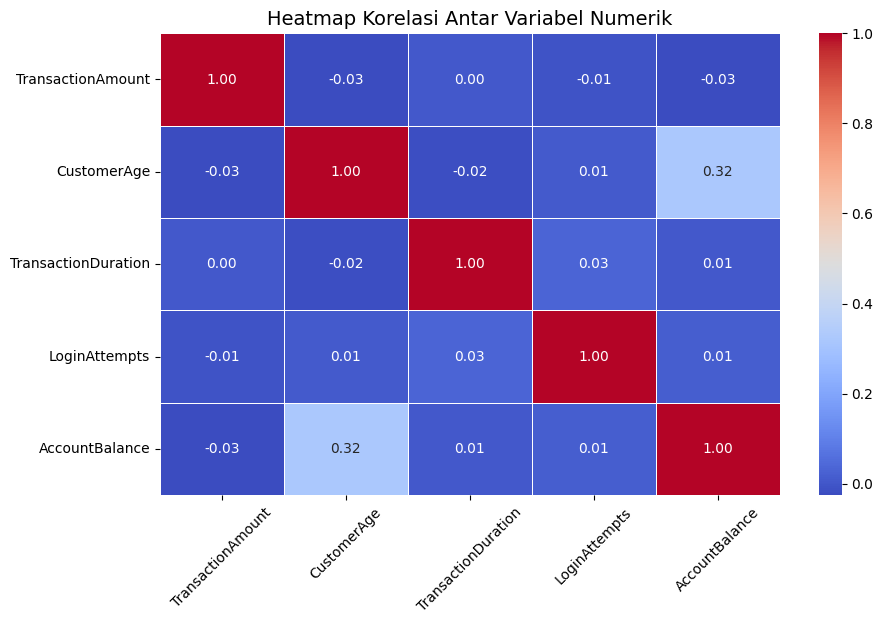

In [12]:
# Heatmap Korelasi Antar Variabel Numerik
# Pilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))

# Membuat heatmap dengan korelasi antar variabel numerik
sns.heatmap(df[numerical_columns].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,  # Tambahkan garis pembatas antar sel
            cbar=True)  # Tampilkan color bar

plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=14)
plt.xticks(rotation=45)  # Rotasi label sumbu X agar lebih mudah dibaca
plt.yticks(rotation=0)  # Pastikan label sumbu Y tetap horizontal
plt.show()

**Insight Heatmap Korelasi Antar Variabel Numerik**

1. Korelasi Rendah Antar Variabel

* Sebagian besar variabel memiliki korelasi yang sangat rendah satu sama lain (mendekati 0), yang menunjukkan bahwa tidak ada hubungan linier yang kuat di antara mereka.

2. Korelasi Positif Tertinggi: CustomerAge vs AccountBalance (+0.32)

* Terdapat korelasi positif moderat (0.32) antara CustomerAge (Usia Pelanggan) dan AccountBalance (Saldo Akun).

* Artinya, semakin tua usia pelanggan, cenderung memiliki saldo akun yang lebih tinggi.

* Hal ini bisa terjadi karena pelanggan yang lebih tua mungkin memiliki kebiasaan menabung yang lebih stabil dibandingkan yang lebih muda.

3. Korelasi Sangat Lemah dengan TransactionAmount

* TransactionAmount (Jumlah Transaksi) memiliki korelasi yang sangat rendah dengan semua variabel lain (di bawah ±0.03).

* Ini menunjukkan bahwa faktor seperti usia pelanggan, durasi transaksi, atau jumlah percobaan login tidak memiliki hubungan langsung yang signifikan dengan jumlah transaksi.

4. Tidak Ada Korelasi Signifikan pada LoginAttempts

* LoginAttempts (Jumlah Percobaan Login) tidak memiliki hubungan kuat dengan variabel lain.

* Artinya, jumlah percobaan login yang dilakukan pelanggan tidak berhubungan langsung dengan usia, jumlah saldo, atau jumlah transaksi mereka.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [13]:
# Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Missing Values:\n", df.isnull().sum())

Jumlah Missing Values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Tidak terdapat missing value.

#### 2. Mengahapus Data Duplikat

In [14]:
# Menampilkan jumlah data duplikat
duplicate_rows = df[df.duplicated()] # Change 'dataset' to 'df'
print(f"Jumlah duplikat dalam dataset: {duplicate_rows.shape[0]}")

# Menampilkan data yang duplikat (jika ada)
if not duplicate_rows.empty:
    print("\nData yang terduplikasi:")
    print(duplicate_rows)
else:
    print("\nTidak ada data duplikat dalam dataset.")

Jumlah duplikat dalam dataset: 0

Tidak ada data duplikat dalam dataset.


Tidak ada data duplikat dalam dataset.

#### 3. Normalisasi atau Standarisasi Fitur

In [15]:
df[numerical_columns].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


* Dataset ini memiliki beragam skala dan
distribusi, yang menandakan perlunya normalisasi atau standarisasi sebelum diterapkan pada model.

* Ada kemungkinan outlier atau anomali, terutama di TransactionAmount, AccountBalance, dan LoginAttempts, yang bisa dianalisis lebih lanjut.

* LoginAttempts yang mayoritas bernilai 1 kali login tetapi memiliki maksimum 5 kali login bisa menjadi indikator aktivitas yang tidak biasa.

In [16]:
df_copy = df.copy()

# Tentukan langsung kolom numerik dan kategorikal
numerical_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
categorical_columns = ["TransactionType", "CustomerOccupation", "Location", "DeviceID", "MerchantID", "Channel"]

# Fitur numerik yang akan dinormalisasi (CustomerAge sudah termasuk sekarang)
features_to_normalize = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']

# Cek nilai sebelum normalisasi
print("Sebelum Normalisasi:")
print(df_copy[features_to_normalize].describe())

# Pastikan LoginAttempts tidak memiliki NaN atau nilai aneh sebelum transformasi
if 'LoginAttempts' in df_copy.columns:
    df_copy['LoginAttempts'] = pd.to_numeric(df_copy['LoginAttempts'], errors='coerce')  # Konversi ke float
    df_copy['LoginAttempts'].fillna(df_copy['LoginAttempts'].median(), inplace=True)  # Isi NaN dengan median

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan transformasi hanya pada fitur yang dipilih
df_copy[features_to_normalize] = scaler.fit_transform(df_copy[features_to_normalize].copy())

# Cek hasil setelah normalisasi
print("\nSetelah Normalisasi:")
print(df_copy[features_to_normalize].describe())

# Gabungkan kembali dengan data kategorikal
df_processed = pd.concat([df_copy[features_to_normalize], df_copy[categorical_columns]], axis=1)

# Tampilkan hasil transformasi
print("\nData setelah normalisasi:")
print(df_processed.head())

Sebelum Normalisasi:
       TransactionAmount  AccountBalance  TransactionDuration  LoginAttempts  \
count        2512.000000     2512.000000          2512.000000    2512.000000   
mean          297.593778     5114.302966           119.643312       1.124602   
std           291.946243     3900.942499            69.963757       0.602662   
min             0.260000      101.250000            10.000000       1.000000   
25%            81.885000     1504.370000            63.000000       1.000000   
50%           211.140000     4735.510000           112.500000       1.000000   
75%           414.527500     7678.820000           161.000000       1.000000   
max          1919.110000    14977.990000           300.000000       5.000000   

       CustomerAge  
count  2512.000000  
mean     44.673965  
std      17.792198  
min      18.000000  
25%      27.000000  
50%      45.000000  
75%      59.000000  
max      80.000000  

Setelah Normalisasi:
       TransactionAmount  AccountBalance  Trans

<ipython-input-16-2100b3e17631>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['LoginAttempts'].fillna(df_copy['LoginAttempts'].median(), inplace=True)  # Isi NaN dengan median


**Insight dari Hasil Normalisasi Data**

1. **Rentang Data Sudah Terstandarisasi**
   - Semua fitur numerik (`TransactionAmount`, `AccountBalance`, `TransactionDuration`, `LoginAttempts`, `CustomerAge`) telah berhasil dinormalisasi ke rentang **0 sampai 1**.
   - Hal ini penting agar model machine learning yang kamu bangun nanti tidak berat sebelah (karena perbedaan skala fitur sudah dihilangkan).

2. **Distribusi Fitur Setelah Normalisasi**
   - **TransactionAmount** rata-rata bernilai kecil (~0.15), menunjukkan sebagian besar transaksi bernilai kecil jika dibandingkan transaksi terbesar.
   - **AccountBalance** punya rata-rata sekitar 0.33, artinya banyak nasabah memiliki saldo menengah, namun tetap ada yang sangat rendah dan sangat tinggi.
   - **TransactionDuration** cenderung memiliki nilai rata-rata di sekitar 0.37, menunjukkan durasi transaksi kebanyakan tidak terlalu lama.
   - **LoginAttempts** memiliki rata-rata sangat rendah (~0.03) setelah normalisasi, menunjukkan mayoritas pengguna hanya butuh 1 kali login (karena nilai login 1 jadi normalisasi mendekati 0).
   - **CustomerAge** rata-rata 0.43 setelah normalisasi, mengindikasikan bahwa kebanyakan nasabah berada di usia pertengahan dari rentang 18 - 80 tahun.


#### 4. Deteksi dan Penanganan Outlier

In [17]:
df_outlier = df_processed.copy()

# Pastikan tidak ada missing values di fitur yang akan dianalisis
df_outlier = df_outlier.dropna(subset=features_to_normalize)

# Menentukan batas outlier dengan IQR
Q1 = df_outlier[features_to_normalize].quantile(0.25)
Q3 = df_outlier[features_to_normalize].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = ((df_outlier[features_to_normalize] < lower_bound) |
            (df_outlier[features_to_normalize] > upper_bound))

# Menampilkan jumlah outlier per fitur
print("Jumlah outlier per fitur:\n", outliers.sum())

# Menampilkan jumlah total outlier di dataset
print("Total jumlah outlier dalam dataset:", outliers.sum().sum())

Jumlah outlier per fitur:
 TransactionAmount      113
AccountBalance           0
TransactionDuration      0
LoginAttempts          122
CustomerAge              0
dtype: int64
Total jumlah outlier dalam dataset: 235


**Insight dari Deteksi Outlier**

1. **Total Outlier yang Ditemukan**  
   - Terdapat **235 data** yang terdeteksi sebagai outlier dari total data yang dianalisis.

2. **Fitur dengan Outlier**
   - **TransactionAmount** memiliki **113 outlier**, artinya ada cukup banyak transaksi dengan nilai yang jauh lebih kecil atau jauh lebih besar dibanding transaksi normal lainnya. Ini wajar, karena dalam transaksi nyata bisa saja ada transaksi sangat kecil atau sangat besar.
   - **LoginAttempts** memiliki **122 outlier**, menunjukkan ada banyak kasus pengguna yang melakukan login lebih dari normal, atau sangat jarang login (mungkin hanya sekali), sehingga terdeteksi sebagai outlier.
   - **AccountBalance**, **TransactionDuration**, dan **CustomerAge** tidak ditemukan outlier, berarti distribusi datanya masih dalam batas wajar menurut metode IQR.


In [18]:
# Menampilkan jumlah data sebelum penghapusan
print("Jumlah data sebelum menghapus outlier:", df_outlier.shape)

# Menghapus baris yang mengandung minimal satu outlier
df_outlier_removed = df_outlier[~outliers.any(axis=1)]

# Menampilkan jumlah data setelah penghapusan
print("Jumlah data setelah menghapus outlier:", df_outlier_removed.shape)

Jumlah data sebelum menghapus outlier: (2512, 11)
Jumlah data setelah menghapus outlier: (2282, 11)


* Deteksi outlier dengan IQR membantu menemukan data ekstrem yang dapat memengaruhi model analisis atau machine learning.

* Jumlah data setelah menghapus outliner dalah 2282

#### 5. Encoding Data Kategorikal

In [19]:
df_encoded = df.copy()

# Dictionary untuk menyimpan LabelEncoder
label_encoders = {}

# 1. Label Encoding untuk TransactionType (tidak ada NaN)
df_encoded['TransactionType'] = df_encoded['TransactionType'].map({'Debit': 0, 'Credit': 1})

# 2. One-Hot Encoding untuk Channel & CustomerOccupation
one_hot_features = ['Channel', 'CustomerOccupation']
df_encoded[one_hot_features] = df_encoded[one_hot_features].astype(str)  # Pastikan string sebelum encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_features, drop_first=True)

# 3. Label Encoding untuk MerchantID (dengan penyimpanan encoder)
df_encoded['MerchantID'] = df_encoded['MerchantID'].astype(str)  # Pastikan string
le = LabelEncoder()
df_encoded['MerchantID'] = le.fit_transform(df_encoded['MerchantID'])

# 4. One-Hot Encoding untuk Location (jika tersedia)
if 'Location' in df_encoded.columns:
    df_encoded['Location'] = df_encoded['Location'].astype(str)  # Pastikan string
    df_encoded = pd.get_dummies(df_encoded, columns=['Location'], drop_first=True)

# 5. Konversi Datetime ke fitur numerik
df_encoded['TransactionDate'] = pd.to_datetime(df_encoded['TransactionDate'])  # Tidak perlu error handling jika sudah bersih
df_encoded['TransactionYear'] = df_encoded['TransactionDate'].dt.year
df_encoded['TransactionMonth'] = df_encoded['TransactionDate'].dt.month
df_encoded['TransactionDay'] = df_encoded['TransactionDate'].dt.day
df_encoded['TransactionHour'] = df_encoded['TransactionDate'].dt.hour
df_encoded.drop(columns=['TransactionDate'], inplace=True)  # Hapus kolom asli setelah ekstraksi fitur

# 6. Konversi PreviousTransactionDate jika tersedia
if 'PreviousTransactionDate' in df_encoded.columns:
    df_encoded['PreviousTransactionDate'] = pd.to_datetime(df_encoded['PreviousTransactionDate'])
    df_encoded['PrevTransactionYear'] = df_encoded['PreviousTransactionDate'].dt.year
    df_encoded['PrevTransactionMonth'] = df_encoded['PreviousTransactionDate'].dt.month
    df_encoded['PrevTransactionDay'] = df_encoded['PreviousTransactionDate'].dt.day
    df_encoded['PrevTransactionHour'] = df_encoded['PreviousTransactionDate'].dt.hour
    df_encoded.drop(columns=['PreviousTransactionDate'], inplace=True)

# 7. Hapus kolom yang tidak diperlukan jika ada dalam dataset
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address']
df_encoded.drop(columns=[col for col in columns_to_drop if col in df_encoded.columns], inplace=True)

# Cek hasil encoding
print("Data setelah encoding kategorikal:")
print(df_encoded.head())

Data setelah encoding kategorikal:
   TransactionAmount  TransactionType  MerchantID  CustomerAge  \
0              14.09                0          14           70   
1             376.24                0          51           68   
2             126.29                0           8           19   
3             184.50                0           1           26   
4              13.45                1          90           26   

   TransactionDuration  LoginAttempts  AccountBalance  Channel_Branch  \
0                   81              1         5112.21           False   
1                  141              1        13758.91           False   
2                   56              1         1122.35           False   
3                   25              1         8569.06           False   
4                  198              1         7429.40           False   

   Channel_Online  CustomerOccupation_Engineer  ...  Location_Virginia Beach  \
0           False                        False  .

**Insight dari Proses Encoding Data Kategorikal**

1. **TransactionType**  
   - Berhasil diubah menjadi angka dengan metode **Label Encoding**:  
     - `Debit = 0`
     - `Credit = 1`
   - Ini mempermudah model dalam memahami jenis transaksi sebagai informasi numerik.

2. **Channel** dan **CustomerOccupation**  
   - Di-*encode* dengan metode **One-Hot Encoding**.
   - Setiap kategori seperti `Channel_Online`, `Channel_Branch`, `CustomerOccupation_Engineer`, dll. menjadi kolom baru bernilai `True` atau `False`.
   - Ini akan membuat model bisa membedakan setiap jenis *channel* dan *occupation* tanpa mengasumsikan adanya urutan (*ordinal*).

3. **MerchantID**  
   - Di-*encode* menggunakan **Label Encoding**, dengan penyimpanan encoder agar bisa dilakukan *inverse transform* nantinya.
   - Ini penting, karena ID merchant bersifat kategorikal namun berbentuk ID unik sehingga cocok diberi label numerik.
   - Encoder disimpan dalam dictionary `label_encoders` sehingga bisa dikembalikan ke bentuk aslinya kapan saja.

4. **Location**  
   - Di-*encode* juga dengan **One-Hot Encoding** (hanya jika kolom ini tersedia).
   - Fitur seperti `Location_Washington` dan `Location_Virginia Beach` berhasil dipecah menjadi kolom biner.

5. **TransactionDate** & **PreviousTransactionDate**  
   - Tidak hanya dikonversi ke tipe `datetime`, tapi juga dipecah menjadi informasi penting:
     - Tahun, Bulan, Hari, dan Jam.
   - Ini penting karena model bisa memanfaatkan pola perilaku transaksi berdasarkan waktu, misal kecenderungan fraud di jam-jam tertentu.

6. **Penghapusan Kolom Tidak Relevan**  
   - Kolom seperti `TransactionID`, `AccountID`, `DeviceID`, dan `IP Address` dihapus agar tidak mempengaruhi model (biasanya ID unik tidak informatif untuk prediksi).


#### 6. Binning (Pengelompokan Data)

In [20]:
# Pastikan data numerik dan tangani NaN dengan median jika perlu
numeric_columns = ['TransactionAmount', 'CustomerAge', 'AccountBalance']
df_encoded[numeric_columns] = df_encoded[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Mengganti NaN dengan median untuk menghindari error saat binning
df_encoded[numeric_columns] = df_encoded[numeric_columns].fillna(df_encoded[numeric_columns].median())

# 1. Binning untuk CustomerAge (Usia)
age_bins = [0, 25, 40, 55, np.inf]
age_labels = ['Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df_encoded['Kelompok_CustomerAge'] = pd.cut(df_encoded['CustomerAge'], bins=age_bins, labels=age_labels, include_lowest=True)

# 2. Binning untuk TransactionAmount (Jumlah Transaksi)
if df_encoded['TransactionAmount'].nunique() > 3:
    df_encoded['Kelompok_TransactionAmount'] = pd.qcut(df_encoded['TransactionAmount'], q=4,
                                                       labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                                                       duplicates='drop')
else:
    transaction_bins = np.unique([
        df_encoded['TransactionAmount'].min(),
        df_encoded['TransactionAmount'].quantile(0.25),
        df_encoded['TransactionAmount'].quantile(0.5),
        df_encoded['TransactionAmount'].quantile(0.75),
        df_encoded['TransactionAmount'].max()
    ])
    if len(transaction_bins) > 2:
        df_encoded['Kelompok_TransactionAmount'] = pd.cut(df_encoded['TransactionAmount'], bins=transaction_bins,
                                                         labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                                                         include_lowest=True)
    else:
        df_encoded['Kelompok_TransactionAmount'] = 'Tidak Terkategorikan'

# 3. Binning untuk AccountBalance (Saldo Akun)
if df_encoded['AccountBalance'].nunique() > 3:
    df_encoded['Kelompok_AccountBalance'] = pd.qcut(df_encoded['AccountBalance'], q=4,
                                                labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                                                duplicates='drop')
else:
    balance_bins = np.unique([
        df_encoded['AccountBalance'].min(),
        df_encoded['AccountBalance'].quantile(0.25),
        df_encoded['AccountBalance'].quantile(0.5),
        df_encoded['AccountBalance'].quantile(0.75),
        df_encoded['AccountBalance'].max()
    ])
    if len(balance_bins) > 2:
        df_encoded['Kelompok_AccountBalance'] = pd.cut(df_encoded['AccountBalance'], bins=balance_bins,
                                                   labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'],
                                                   include_lowest=True)
    else:
        df_encoded['Kelompok_AccountBalance'] = 'Tidak Terkategorikan'

# Menyimpan dataset hasil preprocessing ke dalam variabel df_clean
df_clean = df_encoded.copy()

# 4. Menampilkan Distribusi Kategori
print("\nDistribusi CustomerAge:")
print(df_clean['Kelompok_CustomerAge'].value_counts(dropna=False))

print("\nDistribusi Kelompok TransactionAmount:")
print(df_clean['Kelompok_TransactionAmount'].value_counts(dropna=False))

print("\nDistribusi Kelompok AccountBalance:")
print(df_clean['Kelompok_AccountBalance'].value_counts(dropna=False))

# 5. Menampilkan DataFrame setelah binning
print("\nData Setelah Binning:")
print(df_clean[['CustomerAge', 'Kelompok_CustomerAge', 'TransactionAmount', 'Kelompok_TransactionAmount',
                 'AccountBalance', 'Kelompok_AccountBalance']].head())


Distribusi CustomerAge:
Kelompok_CustomerAge
Lansia        816
Dewasa        637
Paruh Baya    584
Muda          475
Name: count, dtype: int64

Distribusi Kelompok TransactionAmount:
Kelompok_TransactionAmount
Rendah           628
Sedang           628
Tinggi           628
Sangat Tinggi    628
Name: count, dtype: int64

Distribusi Kelompok AccountBalance:
Kelompok_AccountBalance
Rendah           628
Sedang           628
Tinggi           628
Sangat Tinggi    628
Name: count, dtype: int64

Data Setelah Binning:
   CustomerAge Kelompok_CustomerAge  TransactionAmount  \
0           70               Lansia              14.09   
1           68               Lansia             376.24   
2           19                 Muda             126.29   
3           26               Dewasa             184.50   
4           26               Dewasa              13.45   

  Kelompok_TransactionAmount  AccountBalance Kelompok_AccountBalance  
0                     Rendah         5112.21                  Tin

In [21]:
# Ambil fitur numerik hasil encoding dan binning
df_final = df_clean.select_dtypes(include=[np.number]).copy()

# Pastikan tidak ada NaN atau missing values
df_final.fillna(0, inplace=True)

# Cek hasil akhir sebelum digunakan untuk clustering
print("\nShape df_final:", df_final.shape)
print(df_final.head())


Shape df_final: (2512, 15)
   TransactionAmount  TransactionType  MerchantID  CustomerAge  \
0              14.09                0          14           70   
1             376.24                0          51           68   
2             126.29                0           8           19   
3             184.50                0           1           26   
4              13.45                1          90           26   

   TransactionDuration  LoginAttempts  AccountBalance  TransactionYear  \
0                   81              1         5112.21             2023   
1                  141              1        13758.91             2023   
2                   56              1         1122.35             2023   
3                   25              1         8569.06             2023   
4                  198              1         7429.40             2023   

   TransactionMonth  TransactionDay  TransactionHour  PrevTransactionYear  \
0                 4              11               16 

**Insight Hasil Binning Data**

**1. Distribusi Usia (CustomerAge)**
- Mayoritas pelanggan berada pada kategori Lansia (usia > 55 tahun) sebanyak 816 orang.
- Disusul oleh kategori Dewasa (26-40 tahun) sebanyak 637 orang dan Paruh Baya (41-55 tahun) sebanyak 584 orang.
- Kelompok usia Muda (≤25 tahun) menjadi kelompok paling sedikit, hanya 475 orang.
  
**2. Distribusi Jumlah Transaksi (Transaction Amount)**
- Setiap kategori memiliki jumlah yang sangat seimbang:
    - Rendah: 628
    - Sedang: 628
    - Tinggi: 628
    - Sangat Tinggi: 628

**3. Distribusi Saldo Akun (Account Balance)**
- Sama seperti jumlah transaksi, saldo akun pelanggan terdistribusi secara merata:
    - Rendah: 628
    - Sedang: 628
    - Tinggi: 628
    - Sangat Tinggi: 628


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
# Menentukan fitur yang digunakan untuk clustering
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

# Menentukan jumlah klaster dan melatih model K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit model dan buat label klaster
df_clean["Cluster"] = kmeans.fit_predict(df_clean[features])

# Lihat distribusi klaster
print("\nDistribusi Klaster:")
print(df_clean["Cluster"].value_counts())

# Tampilkan beberapa baris pertama dengan klaster yang telah terbentuk
print(df_clean[['CustomerAge', 'TransactionAmount', 'TransactionDuration', 'AccountBalance', 'Cluster']].head())


Distribusi Klaster:
Cluster
1    1151
0     944
2     417
Name: count, dtype: int64
   CustomerAge  TransactionAmount  TransactionDuration  AccountBalance  \
0           70              14.09                   81         5112.21   
1           68             376.24                  141        13758.91   
2           19             126.29                   56         1122.35   
3           26             184.50                   25         8569.06   
4           26              13.45                  198         7429.40   

   Cluster  
0        0  
1        2  
2        1  
3        0  
4        0  


**Insight: Pembangunan Model Clustering**

**a) Pemilihan Algoritma**

Pada tahap ini, algoritma clustering yang dipilih adalah K-Means.  
Alasan pemilihan K-Means adalah:
- Algoritma ini sederhana, cepat, dan efektif untuk dataset berskala menengah seperti yang digunakan.
- Cocok digunakan saat ingin menemukan pola kelompok (cluster) berdasarkan kesamaan jarak (distance-based).
- Mudah diinterpretasikan karena menghasilkan centroid yang jelas untuk setiap cluster.

**b) Fitur yang Digunakan**
Model clustering dilatih dengan mempertimbangkan 4 fitur utama yang merepresentasikan karakteristik penting dari pelanggan:
1. **TransactionAmount** (Jumlah Transaksi)
2. **CustomerAge** (Usia Pelanggan)
3. **TransactionDuration** (Durasi Transaksi)
4. **AccountBalance** (Saldo Akun)

Keempat fitur ini dipilih karena secara logika bisnis memiliki kontribusi kuat dalam membedakan karakteristik pelanggan.

**c) Pelatihan Model**
- Model K-Means dibangun dengan jumlah klaster (k) = 3 yang ditentukan secara manual.
- Model kemudian dilatih menggunakan data yang telah dibersihkan dan dibinning.
- Setiap pelanggan kemudian diberikan label klaster (0, 1, atau 2) berdasarkan hasil pembelajaran model.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah cluster: 2, Silhouette Score: 0.6180 - ❌ Tidak Disimpan
Jumlah cluster: 3, Silhouette Score: 0.6236 - ❌ Tidak Disimpan
Jumlah cluster: 4, Silhouette Score: 0.5968 - ❌ Tidak Disimpan
Jumlah cluster: 5, Silhouette Score: 0.5714 - ❌ Tidak Disimpan
Jumlah cluster: 6, Silhouette Score: 0.5365 - ❌ Tidak Disimpan
Jumlah cluster: 7, Silhouette Score: 0.4796 - ❌ Tidak Disimpan
Jumlah cluster: 8, Silhouette Score: 0.4741 - ❌ Tidak Disimpan
Jumlah cluster: 9, Silhouette Score: 0.4585 - ❌ Tidak Disimpan
Jumlah cluster: 10, Silhouette Score: 0.4453 - ❌ Tidak Disimpan

Jumlah cluster optimal berdasarkan Elbow Method: 3
Jumlah cluster optimal berdasarkan Silhouette Score: 3

Silhouette Score (K Optimal = 3): 0.6236


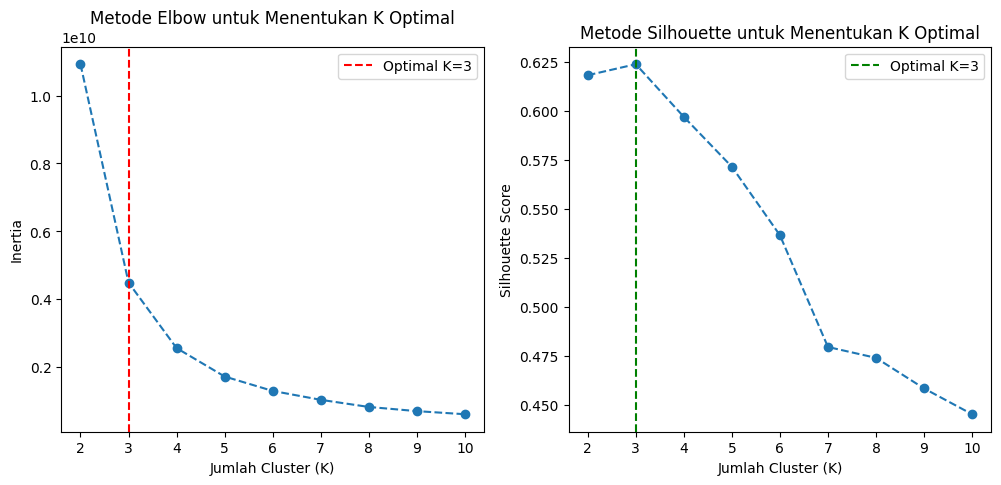

In [23]:
# Rentang jumlah cluster yang diuji (K=2 hingga K=10)
range_clusters = list(range(2, 11))
inertia = []
silhouette_scores = []

# Loop untuk menghitung inertia dan silhouette score pada tiap K
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clean[features])  # Cluster assignment

    inertia.append(kmeans.inertia_)  # Simpan inertia
    silhouette_score_k = silhouette_score(df_clean[features], labels)  # Hitung Silhouette Score
    silhouette_scores.append(silhouette_score_k)

    # Menampilkan hasil dengan format yang diinginkan
    print(f"Jumlah cluster: {k}, Silhouette Score: {silhouette_score_k:.4f} - ❌ Tidak Disimpan")

# Menentukan jumlah cluster optimal berdasarkan Elbow (titik siku)
inertia_diff = np.diff(inertia)
elbow_k = range_clusters[np.argmin(inertia_diff) + 1]  # Titik elbow

# Menentukan jumlah cluster optimal berdasarkan Silhouette Score (nilai tertinggi)
silhouette_k = range_clusters[np.argmax(silhouette_scores)]  # Nilai silhouette tertinggi

# Menampilkan hasil akhir
print(f"\nJumlah cluster optimal berdasarkan Elbow Method: {elbow_k}")
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {silhouette_k}")

# Menampilkan Silhouette Score untuk K Optimal dengan benar
silhouette_optimal = silhouette_scores[range_clusters.index(silhouette_k)]
print(f"\nSilhouette Score (K Optimal = {silhouette_k}): {silhouette_optimal:.4f}")

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.axvline(elbow_k, color='r', linestyle='--', label=f'Optimal K={elbow_k}')
plt.legend()

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette untuk Menentukan K Optimal')
plt.axvline(silhouette_k, color='g', linestyle='--', label=f'Optimal K={silhouette_k}')
plt.legend()

plt.show()

**Insight: Evaluasi Model Clustering**


Untuk menentukan jumlah klaster yang optimal, dua metode evaluasi digunakan:

1. **Elbow Method**  
   Metode ini memanfaatkan nilai inertia, yaitu total jarak kuadrat antara setiap titik dengan pusat klasternya.  
   Pada grafik Elbow terlihat bahwa terjadi penurunan inertia yang signifikan saat K=3, dan setelah itu penurunan menjadi lebih landai.  
   Hal ini menunjukkan bahwa K=3 adalah titik "siku" atau titik optimal, karena setelah K=3, penambahan klaster tidak memberikan penurunan inertia yang signifikan.

2. **Silhouette Score**  
   Metode ini mengukur seberapa baik objek dalam klaster terpisah dari klaster lainnya. Semakin tinggi skor, semakin baik pemisahan antar klaster.  
   Hasilnya menunjukkan bahwa:
   - K=3 memberikan nilai Silhouette Score tertinggi yaitu sebesar 0.6236 dibandingkan jumlah klaster lainnya.
   - Semakin banyak klaster (K > 3), justru nilai Silhouette Score menurun yang menandakan bahwa pemisahan klaster menjadi kurang baik.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

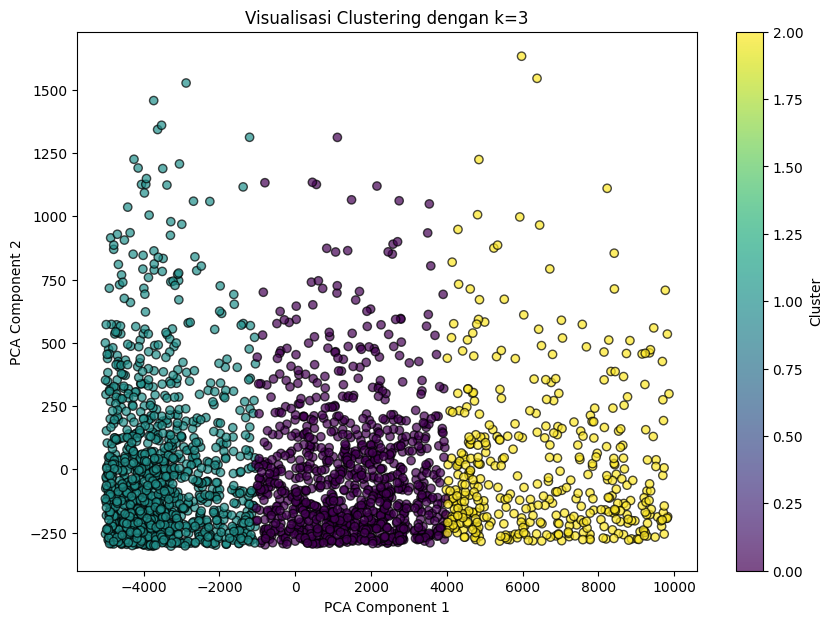

Kontribusi fitur asli terhadap komponen utama PCA:
     TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
PC1          -0.001894     0.001459             0.000100        0.999997
PC2           0.999997    -0.001072             0.001145        0.001895


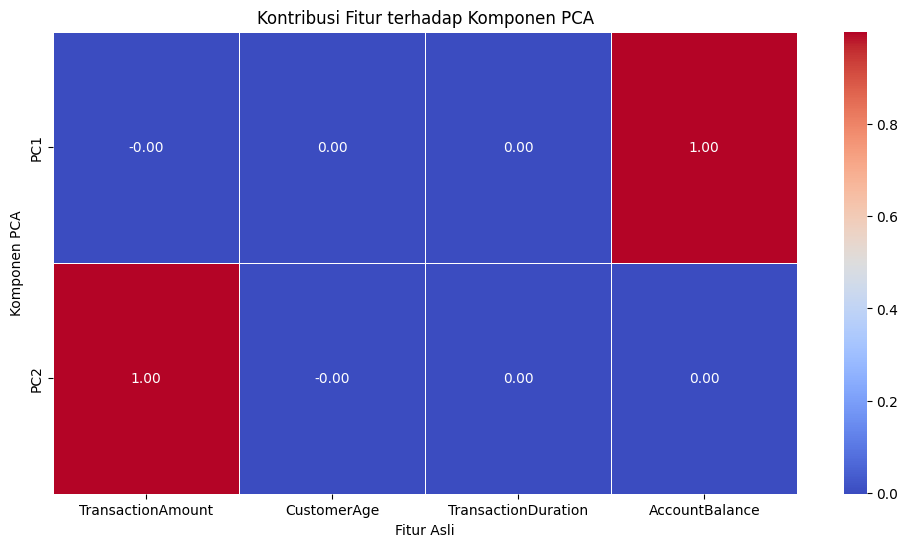

In [24]:
# 1. Menentukan jumlah cluster optimal berdasarkan Silhouette Score
silhouette_optimal = silhouette_k  # Hasil dari evaluasi sebelumnya

# 2. Melatih K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=silhouette_optimal, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans_optimal.fit_predict(df_clean[features])

# 3. Reduksi Dimensi dengan PCA ke 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clean[features])

# 4. Visualisasi hasil clustering dalam bentuk scatter plot PCA
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_clean["Cluster"], cmap='viridis', alpha=0.7, edgecolors='k')
plt.title(f'Visualisasi Clustering dengan k={silhouette_optimal}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 5. Kontribusi fitur asli terhadap PCA Components
numerical_features = features  # Fitur numerik yang digunakan
pca_components = pd.DataFrame(
    pca.components_,
    columns=numerical_features,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("Kontribusi fitur asli terhadap komponen utama PCA:")
print(pca_components)

# 6. Visualisasi kontribusi fitur dengan Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kontribusi Fitur terhadap Komponen PCA")
plt.xlabel("Fitur Asli")
plt.ylabel("Komponen PCA")
plt.show()

 **Insight Hasil Clustering K=3**

**a) Terdapat 3 Segmen Customer yang Terbentuk**
   
   Berdasarkan metode Silhouette, jumlah cluster optimal adalah K=3. Ini menunjukkan bahwa data pelanggan secara alami dapat dikelompokkan menjadi 3 segmen berbeda.

**b) Dominasi Fitur pada PCA**
   Dari heatmap kontribusi PCA:
   - **PC1** didominasi oleh `AccountBalance` (kontribusi positif kuat) dan `TransactionAmount` (kontribusi negatif kuat).
   - **PC2** hampir seluruhnya didominasi oleh `TransactionAmount`.

   Artinya, dua fitur ini menjadi faktor paling penting dalam membedakan cluster:
   - Customer dengan saldo tinggi dan transaksi besar/lama akan cenderung membentuk cluster tersendiri.
   - Customer dengan saldo rendah atau transaksi kecil/lama akan tergolong dalam cluster yang lain.

**c) Distribusi Cluster pada Plot PCA**
   Visualisasi scatter plot menunjukkan bahwa ketiga cluster tersebar cukup jelas di ruang PCA:
   - **Cluster 0** (warna ungu): Cenderung berkumpul di bagian tengah.
   - **Cluster 1** (warna hijau-biru): Lebih dominan pada sisi kiri bawah.
   - **Cluster 2** (warna kuning): Menyebar ke sisi kanan atas.


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [25]:
print(df_clean.columns)

Index(['TransactionAmount', 'TransactionType', 'MerchantID', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'Channel_Branch', 'Channel_Online', 'CustomerOccupation_Engineer',
       'CustomerOccupation_Retired', 'CustomerOccupation_Student',
       'Location_Atlanta', 'Location_Austin', 'Location_Baltimore',
       'Location_Boston', 'Location_Charlotte', 'Location_Chicago',
       'Location_Colorado Springs', 'Location_Columbus', 'Location_Dallas',
       'Location_Denver', 'Location_Detroit', 'Location_El Paso',
       'Location_Fort Worth', 'Location_Fresno', 'Location_Houston',
       'Location_Indianapolis', 'Location_Jacksonville',
       'Location_Kansas City', 'Location_Las Vegas', 'Location_Los Angeles',
       'Location_Louisville', 'Location_Memphis', 'Location_Mesa',
       'Location_Miami', 'Location_Milwaukee', 'Location_Nashville',
       'Location_New York', 'Location_Oklahoma City', 'Location_Omaha',
       'Location_Philadelphia

In [26]:
# 1. Pastikan dataset telah dienkode sebelumnya
df_normalized = df_final.copy()

# 2. Tentukan kolom yang menggunakan Label Encoding dan One-Hot Encoding
label_encoded_columns = ['TransactionType', 'MerchantID']
one_hot_encoded_prefixes = ['Channel_', 'CustomerOccupation_', 'Location_']

# 3. Inisialisasi LabelEncoders untuk mengembalikan nilai asli
label_encoders = {}

# Periksa apakah kolom ada sebelum encoding
for col in label_encoded_columns:
    if col in df_normalized.columns:  # Check if column exists
        le = LabelEncoder()
        df_normalized[col] = le.fit_transform(df_normalized[col])
        label_encoders[col] = le  # Simpan encoder
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame. Encoding dilewati.")

# 4. K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized.drop(columns=[col for col in label_encoded_columns if col in df_normalized.columns]))  # Kecuali kategori

# 5. Debugging - Cek kolom yang masih dalam format numerik
print("Kolom sebelum diubah kembali:")
print(df_normalized.dtypes)

# 6. Mengembalikan Label Encoding
for col in label_encoded_columns:
    if col in df_normalized.columns:
        df_normalized[col] = label_encoders[col].inverse_transform(df_normalized[col].astype(int))

# 7. Mengembalikan One-Hot Encoding menjadi bentuk aslinya
for prefix in one_hot_encoded_prefixes:
    cols = [col for col in df_normalized.columns if col.startswith(prefix)]
    if cols:
        df_normalized[prefix[:-1]] = df_normalized[cols].idxmax(axis=1).str.replace(prefix, '')

# 8. Hapus kolom One-Hot setelah dikembalikan ke bentuk aslinya
df_normalized.drop(columns=[col for prefix in one_hot_encoded_prefixes for col in df_normalized.columns if col.startswith(prefix)], inplace=True)

# 9. Cek hasil transformasi
print("\nData setelah transformasi:")
print(df_normalized.head())

Kolom sebelum diubah kembali:
TransactionAmount       float64
TransactionType           int64
MerchantID                int64
CustomerAge               int64
TransactionDuration       int64
LoginAttempts             int64
AccountBalance          float64
TransactionYear           int32
TransactionMonth          int32
TransactionDay            int32
TransactionHour           int32
PrevTransactionYear       int32
PrevTransactionMonth      int32
PrevTransactionDay        int32
PrevTransactionHour       int32
Cluster                   int32
dtype: object

Data setelah transformasi:
   TransactionAmount  TransactionType  MerchantID  CustomerAge  \
0              14.09                0          14           70   
1             376.24                0          51           68   
2             126.29                0           8           19   
3             184.50                0           1           26   
4              13.45                1          90           26   

   TransactionDurat

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [27]:
df_normalized = df_final.copy()

# Kolom numerik yang ingin distandarisasi
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Melakukan Normalisasi dengan MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalized[numeric_columns] = min_max_scaler.fit_transform(df_normalized[numeric_columns])

# Menyimpan min_max_scaler untuk inverse transform nanti
min_max_scaler_saved = min_max_scaler

# Mengembalikan ke skala asli menggunakan inverse_transform
df_original_standardized = df_normalized.copy()
df_original_standardized[numeric_columns] = min_max_scaler_saved.inverse_transform(df_normalized[numeric_columns])

# Inverse transform untuk MinMaxScaler
df_original_normalized = df_normalized.copy()
df_original_normalized[numeric_columns] = min_max_scaler_saved.inverse_transform(df_normalized[numeric_columns])

print("\nData setelah inverse transform menggunakan MinMaxScaler:")
print(df_original_normalized.head())


Data setelah inverse transform menggunakan MinMaxScaler:
   TransactionAmount  TransactionType  MerchantID  CustomerAge  \
0              14.09                0          14         70.0   
1             376.24                0          51         68.0   
2             126.29                0           8         19.0   
3             184.50                0           1         26.0   
4              13.45                1          90         26.0   

   TransactionDuration  LoginAttempts  AccountBalance  TransactionYear  \
0                 81.0            1.0         5112.21             2023   
1                141.0            1.0        13758.91             2023   
2                 56.0            1.0         1122.35             2023   
3                 25.0            1.0         8569.06             2023   
4                198.0            1.0         7429.40             2023   

   TransactionMonth  TransactionDay  TransactionHour  PrevTransactionYear  \
0                 4    

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Data setelah inverse transform:
       CustomerAge  TransactionAmount  AccountBalance  LoginAttempts
count  2512.000000        2512.000000     2512.000000    2512.000000
mean     44.673965         297.593778     5114.302966       1.124602
std      17.792198         291.946243     3900.942499       0.602662
min      18.000000           0.260000      101.250000       1.000000
25%      27.000000          81.885000     1504.370000       1.000000
50%      45.000000         211.140000     4735.510000       1.000000
75%      59.000000         414.527500     7678.820000       1.000000
max      80.000000        1919.110000    14977.990000       5.000000


Cluster CustomerAge                                   TransactionAmount  \
                count       mean        std   min   max             count   
0       0         944  51.648305  15.776717  18.0  80.0               944   
1       1        1151  37.911381  18.326957  18.0  80.0              1151   
2       2         417  47.551559  13.147018  18.0  70.0               417   

                                 ... AccountBalance                \
         mean         std   min  ...          count          mean   
0  280.395233  263.881658  0.32  ...            944   6546.390011   
1  308.620973  307.713891  0.26  ...           1151   1582.399531   
2  306.090480  306.242572  1.14  ...            417  11621.091175   

                                  LoginAttempts                                
           std      min       max         count      mean       std  min  max  
0  1324.870324  4069.17   9088.36           944  1.110169  0.570150  1.0  5.0  
1  1032.561051   101.25   4064.02          1151  1.119896  0.598153  1.0  5.0  
2  1821.593117  9095.14  14977.99           417  1.170264  0.680977  1.0  5.0  

[3 rows x 21 columns]


Modus (Mode) Fitur Kategorikal per Cluster:


,Cluster,Kelompok_CustomerAge,Kelompok_TransactionAmount,Kelompok_AccountBalance
0,0,Lansia,Tinggi,Tinggi
1,1,Muda,Sangat Tinggi,Rendah
2,2,Lansia,Sedang,Sangat Tinggi


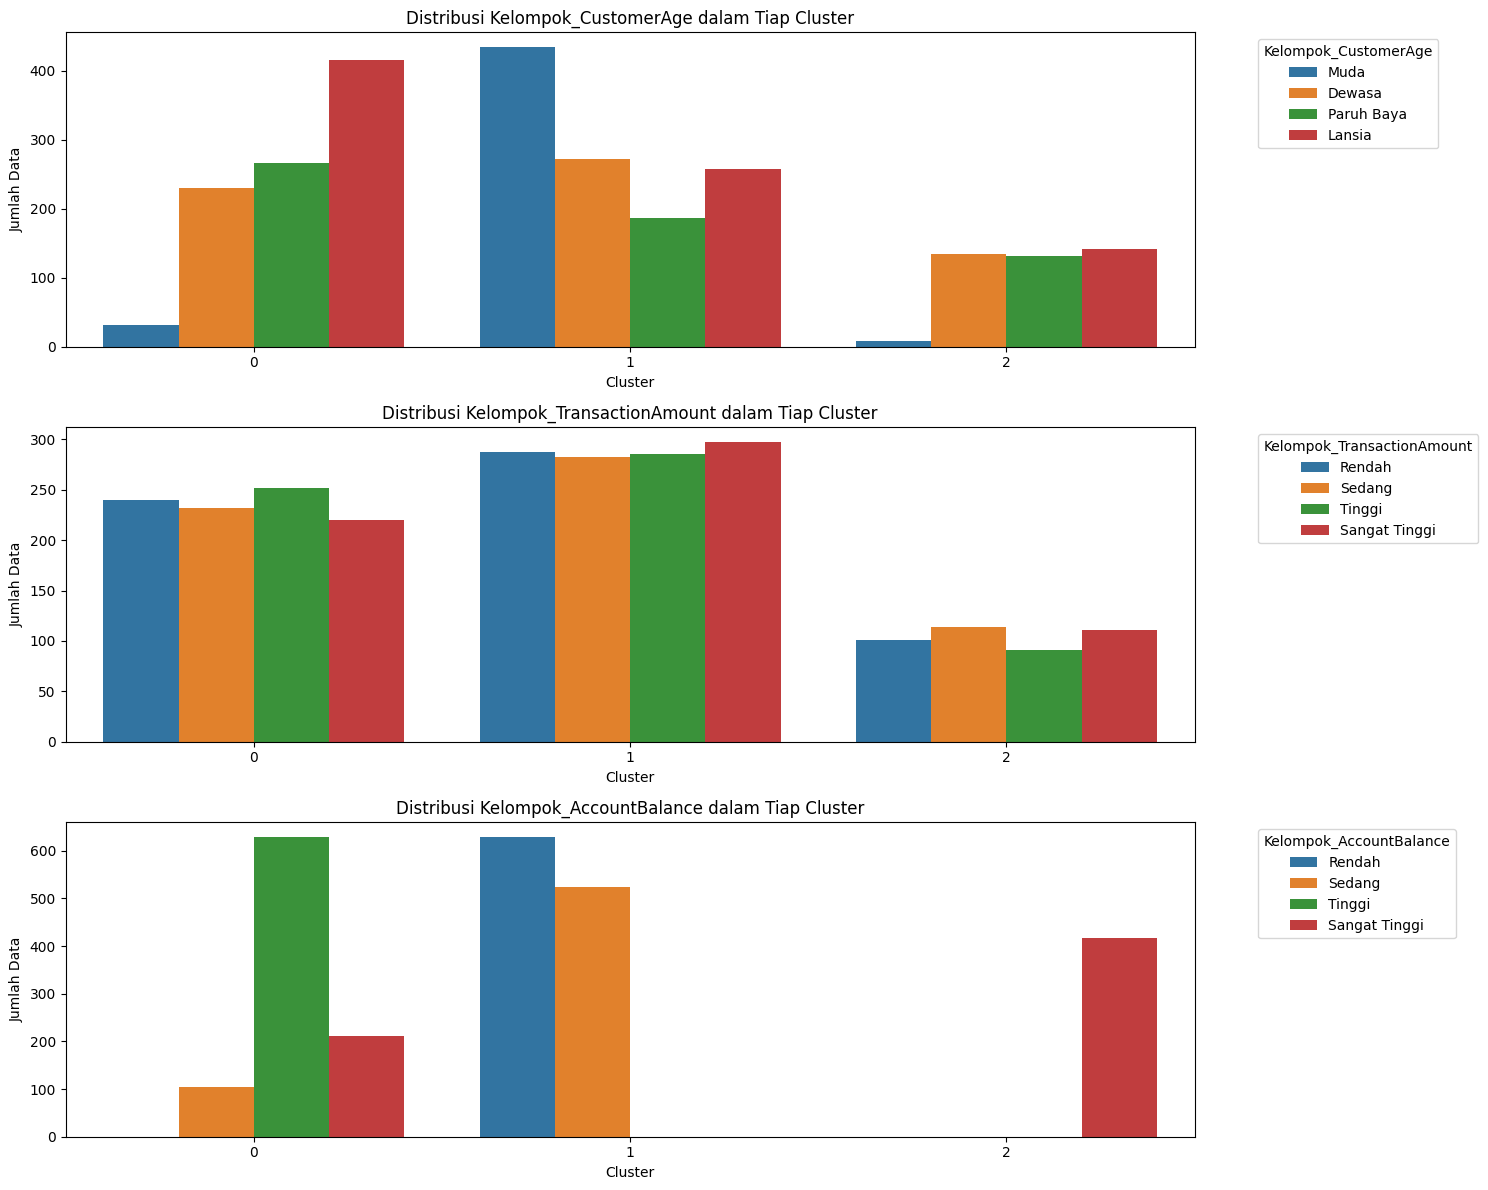

In [28]:
selected_features = ['CustomerAge', 'TransactionAmount', 'AccountBalance', 'LoginAttempts']

# Pastikan 'LoginAttempts' masuk ke dalam daftar fitur yang dinormalisasi
if 'LoginAttempts' not in features_to_normalize:
    features_to_normalize.append('LoginAttempts')

# Inverse Transform untuk Data yang Dinormalisasi
df_inverse = df_copy.copy()  # Buat salinan dari data yang telah dinormalisasi

# Kembalikan ke skala asli menggunakan MinMaxScaler
df_inverse[features_to_normalize] = scaler.inverse_transform(df_copy[features_to_normalize])

# Pastikan fitur kategorikal tetap sama seperti sebelumnya
df_inverse['Cluster'] = df_clean['Cluster']
categorical_columns = ['Kelompok_CustomerAge', 'Kelompok_TransactionAmount', 'Kelompok_AccountBalance']
for col in categorical_columns:
    df_inverse[col] = df_clean[col]


# Tampilkan ringkasan data setelah inverse transform
print("\nData setelah inverse transform:")
print(df_inverse[selected_features].describe())

# Gunakan df_inverse untuk analisis cluster
cluster_summary_df = df_inverse.groupby('Cluster')[selected_features].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()

# Tampilkan hasil
display(cluster_summary_df)

print("\nModus (Mode) Fitur Kategorikal per Cluster:")
cluster_mode_df = df_inverse.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0]).reset_index()
display(cluster_mode_df)

# Visualisasi distribusi fitur kategorikal berdasarkan cluster
plt.figure(figsize=(15, 12))

for i, cat_feature in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=df_inverse, x='Cluster', hue=cat_feature)
    plt.title(f"Distribusi {cat_feature} dalam Tiap Cluster")
    plt.ylabel("Jumlah Data")
    plt.xlabel("Cluster")
    plt.legend(title=cat_feature, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.


#### **1. Cluster 0**
- **CustomerAge** memiliki rata-rata 51.64 tahun, dengan rentang usia minimum 18 tahun dan maksimum 80 tahun.
- **TransactionAmount** memiliki rata-rata transaksi sebesar 280.39, dengan batas minimum 0.32 dan maksimum 1607.55.
- **AccountBalance** memiliki saldo rata-rata sebesar 6546.39, dengan batas minimum 4069.17 dan maksimum 9088.36.
- **LoginAttempts** memiliki rata-rata 1.11 kali, dengan minimum 1 kali dan maksimum 5 kali.

**Modus (Karakteristik Utama) Cluster 0**
- Kelompok_CustomerAge = Lansia
- Kelompok_TransactionAmount = Tinggi
- Kelompok_AccountBalance = Tinggi

**Analisis:**
- Cluster ini didominasi oleh pelanggan yang berusia lanjut dengan saldo rekening dan transaksi yang cenderung tinggi.
- Mereka cenderung lebih stabil dan hati-hati dalam mengelola akun.
- Jumlah percobaan login rendah (sekitar 1 kali rata-rata) menunjukkan mereka jarang mengalami kendala login.
- Segmentasi ini kemungkinan adalah pelanggan loyal dengan kemampuan finansial yang kuat.

#### **2. Cluster 1**
- **CustomerAge** memiliki rata-rata 37.91 tahun, dengan rentang usia minimum 18 tahun dan maksimum 80 tahun.
- **TransactionAmount** memiliki rata-rata transaksi sebesar 300.62, dengan batas minimum 0.26 dan maksimum 1830.0
- **AccountBalance** memiliki saldo rata-rata sebesar 1582.39, dengan batas minimum 101.25 dan maksimum 4064.02.
- **LoginAttempts** memiliki rata-rata 1.11 kali, dengan minimum 1 kali dan maksimum 5 kali.

**Modus (Karakteristik Utama) Cluster 1**
- Kelompok_CustomerAge = Muda
- Kelompok_TransactionAmount = Sangat Tinggi
- Kelompok_AccountBalance = Rendah

**Analisis:**
- Cluster ini didominasi oleh pelanggan muda yang cenderung melakukan transaksi dengan nilai yang sangat tinggi, namun saldo mereka relatif rendah.
- Meskipun transaksinya besar, kemungkinan besar pelanggan ini memanfaatkan fasilitas kredit atau sering melakukan transaksi dengan dana terbatas.
- Tingkat percobaan login yang serupa dengan cluster lain, mengindikasikan mereka cukup familiar menggunakan sistem, walaupun karena mobilitas tinggi mungkin lebih sering berpindah perangkat.

#### **3. Cluster 2**
- **CustomerAge** memiliki rata-rata 47.55 tahun, dengan rentang usia minimum 18 tahun dan maksimum 70 tahun.
- **TransactionAmount** memiliki rata-rata transaksi sebesar 306.09, dengan batas minimum 1.44 dan maksimum 1910.11
- **AccountBalance** memiliki saldo rata-rata sebesar 11621.09, dengan batas minimum 9095.14 dan maksimum 14979.99.
- **LoginAttempts** memiliki rata-rata 1.17 kali, dengan minimum 1 kali dan maksimum 5 kali.

**Modus (Karakteristik Utama) Cluster 2**
- Kelompok_CustomerAge = Lansia
- Kelompok_TransactionAmount = Sedang
- Kelompok_AccountBalance = Sangat Tinggi

**Analisis:**
- Cluster ini unik karena didominasi oleh pelanggan lansia yang memiliki saldo rekening sangat tinggi, namun nilai transaksi mereka hanya sedang.
- Jumlah percobaan login sedikit lebih tinggi dari cluster lain, tetapi masih tergolong rendah.
- Pola ini menunjukkan kemungkinan mereka adalah pelanggan yang lebih memilih menyimpan dana daripada sering melakukan transaksi.
- Segmentasi ini dapat diarahkan untuk penawaran produk investasi atau tabungan jangka panjang.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
# Simpan hasil clustering ke dalam file CSV
df_clean.to_csv("hasil_clustering.csv", index=False)

# Konfirmasi penyimpanan
print("File 'hasil_clustering.csv' telah berhasil disimpan.")

File 'hasil_clustering.csv' telah berhasil disimpan.
